In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
import dateutil.relativedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
Measurement_Columns = inspector.get_columns('measurement')
for column in Measurement_Columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
Station_Columns = inspector.get_columns('station')
for column in Station_Columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
Base = automap_base()
Base.prepare(engine, reflect=True)


In [10]:
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

# Exploratory Climate Analysis

<function matplotlib.pyplot.show(*args, **kw)>

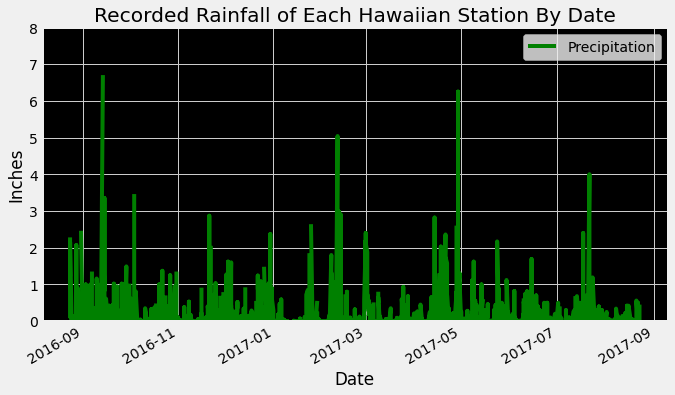

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Max_Date_Query = session.query(Measurement).order_by(Measurement.date.desc()).first()

# Calculate the date 1 year ago from the last data point in the database
Query_Date = dt.datetime.strptime(Max_Date_Query.date, '%Y-%m-%d') - dateutil.relativedelta.relativedelta(months=12)

# Perform a query to retrieve the data and precipitation scores
Query_12_Months_Before_Max = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= Query_Date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
Measure_List_date = [date[0] for date in Query_12_Months_Before_Max[:]]
Measure_List_prcp = [prcp[1] for prcp in Query_12_Months_Before_Max[:]]
Queried_YearSpan_DF = pd.DataFrame({'Date': Measure_List_date, 'Precipitation': Measure_List_prcp})
Queried_YearSpan_DF['Date']=pd.to_datetime(Queried_YearSpan_DF['Date'])
Queried_YearSpan_DF = Queried_YearSpan_DF.set_index('Date')

# Sort the dataframe by date
Queried_YearSpan_DF.sort_values(by=['Date'], inplace=True, ascending=False)

# Use Pandas Plotting with Matplotlib to plot the data
Queried_YearSpan_DF.plot.line(color='green', legend=True, figsize=(10, 6))
plt.title("Recorded Rainfall of Each Hawaiian Station By Date")
plt.xlabel("Date")
plt.ylabel("Inches")
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.set_ylim([0,8])
plt.show


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Queried_YearSpan_DF.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
Unique_Stations_IDs_Query = session.query(Station.id).distinct().count()
print(Unique_Stations_IDs_Query)

9


Station: USC00519281, Reports: 2772
Station: USC00519397, Reports: 2724
Station: USC00513117, Reports: 2709
Station: USC00519523, Reports: 2669
Station: USC00516128, Reports: 2612
Station: USC00514830, Reports: 2202
Station: USC00511918, Reports: 1979
Station: USC00517948, Reports: 1372
Station: USC00518838, Reports: 511
------------------------------------
Most Active Station: USC00519281, Reports: 2772
------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

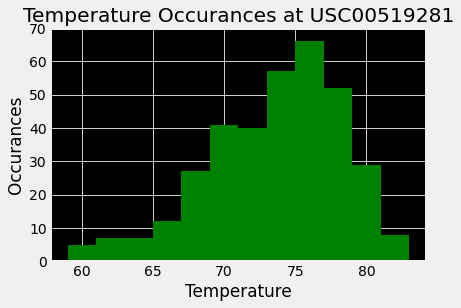

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
Station_Activity_Query = session.query(Measurement.station, func.count(Measurement.station).label('Occurances')).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# List the stations and the counts in descending order.
for station in Station_Activity_Query:
    print(f'Station: {station.station}, Reports: {station.Occurances}')
    
Max_Occurance = session.query(Measurement.station, func.count(Measurement.station).label('Occurances')).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
print('-'*36)
print(f'Most Active Station: {Max_Occurance.station}, Reports: {Max_Occurance.Occurances}')
print('-'*36)
Query_12_Months_USC00519281 = session.query(Measurement.tobs).filter(Measurement.date >= Query_Date).filter(Measurement.station == 'USC00519281').all()
USC00519281_List_tobs = [tobs[0] for tobs in Query_12_Months_USC00519281[:]]
USC00519281_YearSpan_DF = pd.DataFrame({'Temp': USC00519281_List_tobs})
plt.hist(USC00519281_YearSpan_DF['Temp'], bins = 12, color='green')
plt.title("Temperature Occurances at USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Occurances")
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.set_ylim([0,70])
plt.show
